# Problema 4

Sean cuatro variables aleatorias independientes $\varepsilon:i$, todas con distribución dePoisson con media igual 1/2. Determínese P(τ ≤ 1) siendo 

>$T=\frac{\varepsilon _1+\varepsilon _2+\varepsilon _3+\varepsilon _4}{4}$

Vamos a resolver este problema, procurando seguir la metodología vista en el curso.

### 1. Identifique las variables 

Tenemos cuatro $\varepsilon_1$, $\varepsilon_2$, $\varepsilon_3$, $\varepsilon_4$,

### 2 y 3. Determine la distribución de probabilidad y modele las variables aleatorias 

En el planteamiento ya se especifica que $\varepsilon_i\sim Poi(\frac{1}{2})$ para $i=1,2,3,4$.

### 4. Defina el modelo del sistema y los objetivos de la simulación 

Primero vamos a generar 4 variables aleatorias $\varepsilon_i\sim Poi(\frac{1}{2})$ para $i=1,2,3,4$.

In [13]:
import random
import matplotlib.pyplot as plt
from scipy.stats import norm
from math import exp
import numpy as np

In [14]:
# Definir el parámetro de media
media = 1/2

# Generar las cuatro variables aleatorias
epsilon_1 = np.random.poisson(media)
epsilon_2 = np.random.poisson(media)
epsilon_3 = np.random.poisson(media)
epsilon_4 = np.random.poisson(media)
# Calcular la suma y dividir entre 4
T = (epsilon_1 + epsilon_2 + epsilon_3 + epsilon_4) / 4

### 5. Diseñe el experimento

ya que se generaron esas 4 variables aleatorias voy a meterlas en una función para que despues pueda llamar a la función

In [19]:
def generar_variables():
    epsilon_1 = np.random.poisson(1/2)
    epsilon_2 = np.random.poisson(1/2)
    epsilon_3 = np.random.poisson(1/2)
    epsilon_4 = np.random.poisson(1/2)
    T = (epsilon_1 + epsilon_2 + epsilon_3 + epsilon_4) / 4
    return T

In [20]:
X = prob_inter(500)# Asignamos valores a n y realizamos el experimento

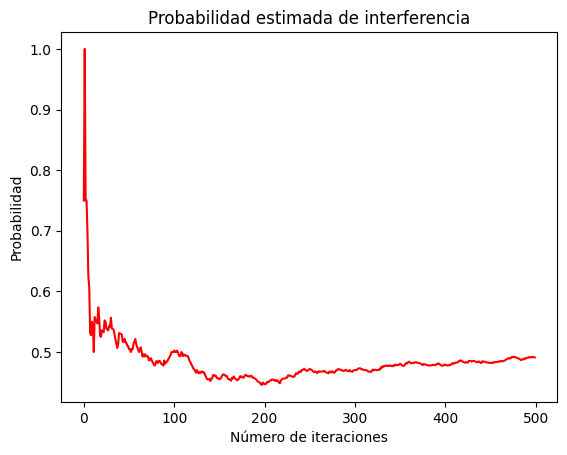

In [22]:
# Configurar los títulos de la gráfica y los ejes
plt.title("Probabilidad estimada de interferencia")
plt.xlabel("Número de iteraciones")
plt.ylabel("Probabilidad")

# Configurar los colores de la gráfica
color = "red"  # Puedes cambiar el color a tu preferencia

# Graficar los datos
plt.plot(X, color=color)

# Mostrar la gráfica
plt.show()                      # La gráfica muestra que la convergencia está garantizada con 500 iteraciones
                                    # Sin embargo, diferentes ejecuciones darán resultados distintos

In [23]:
print(np.mean(X), np.std(X))

0.48390018498487064 0.039914539930038635


### 6. Repita el experimento $n$ veces 

Una forma de hacerlo es mediante el siguiente codigo.

In [24]:
def modelo(n):
    lista = []
    for i in range(n):
        s = prob_inter(500)
        lista.append(np.mean(s))
    return lista

In [27]:
Y=modelo(1000)

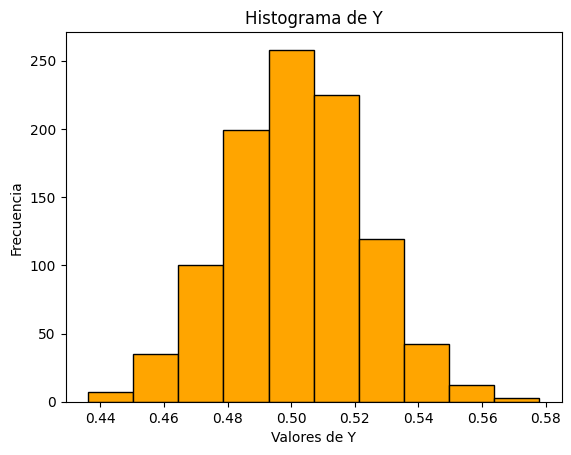

In [30]:
import matplotlib.pyplot as plt

plt.hist(Y, color='orange', edgecolor='black')  # Establece el color de las barras y el borde
plt.title('Histograma de Y')  # Agrega un título al histograma
plt.xlabel('Valores de Y')  # Etiqueta del eje x
plt.ylabel('Frecuencia')  # Etiqueta del eje y

plt.show()  

In [31]:
print(np.mean(Y), np.std(Y))

0.5015704623335998 0.021406852286106986


### Paso 7. Hallamos el intervalo de confianza.

$$\bar{x}-z_{\alpha/2} \cdot \frac{s}{\sqrt{n}} < \mu < \bar{x}+z_{\alpha/2}\cdot \frac{s}{\sqrt{n}}$$

In [32]:
np.mean(Y)

0.5015704623335998

In [33]:
np.mean(Y) - 1.96*np.std(Y)/np.sqrt(50), np.mean(Y) + 1.96*np.std(Y)/np.sqrt(50)

(0.49563678561077673, 0.5075041390564229)

### Para determinar el número de simulaciones

$$ N > \Bigg( \frac{2 \sigma z_{\alpha/2}}{\epsilon} \Bigg) ^2 $$

In [34]:
N = (2*np.std(X)*1.96/0.01)**2

In [35]:
print(N)

244.81295137803406


### Podemos comparar con la sulución analítica del problema.


Dado que las variables aleatorias εᵢ son independientes y siguen una distribución de Poisson con media $\frac{1}{2}$, podemos considerar su suma $T = \frac{\varepsilon_1+\varepsilon_2+\varepsilon_3+\varepsilon_4}{4} como una variable aleatoria con distribución de Poisson con media 4 * 1/2 = 2.

Queremos determinar $P{t\leq 1}$, donde $τ$ es la variable aleatoria $T$. Para calcular esta probabilidad, podemos utilizar la función de distribución acumulativa de la distribución de Poisson.

La función de distribución acumulativa de una variable aleatoria con distribución de Poisson de media λ se define como:

$F(k; \lambda) = P(X \leq k)$

Donde $X$ es la variable aleatoria y $k$ es un valor dado.

En nuestro caso, queremos calcular $P(τ ≤ 1)$, por lo que necesitamos evaluar $F(1, 2)$.

La fórmula de la función de distribución acumulativa de la distribución de Poisson es:

$F(k, \lambda) = e^{-\lambda} * Σ (\frac{\lambda ^i}{i!})$

Donde la suma se realiza desde $i = 0$ hasta $i = k$.

Aplicando esto, tenemos:

$F(1, 2) = e^{-2} * (\frac{2^0}{0!}+\frac{2^1}{1!})$

Simplificando:

$F(1, 2) = e^{-2} * (1 + 2)$

$F(1, 2) = 3 * e^{-2}$

Entonces, $P(τ ≤ 1) = F(1; 2) = 3 * e^(-2)$.

Por lo tanto, la probabilidad de que τ sea menor o igual a 1 es igual a 3 * e^(-2)=0.4060058

In [3]:
from scipy.stats import poisson

# Definir el parámetro de la distribución Poisson
media = 2

# Calcular la función de distribución acumulada (CDF) de la Poisson en τ = 1
probabilidad = poisson.cdf(1, media)

# Imprimir el resultado
print("P(τ ≤ 1) =", probabilidad)


P(τ ≤ 1) = 0.40600584970983794


Pues se parece, pero no esta dentro del intervalo de confianza, una disculpa, parece ser que hasta el ultimo problema pude hacerlo como el profesor lo queria, noto que algunos problemas anteriores tienen mucha paja, o no estan en los lugares correcto, en fin, tengo que ir a trabajar, y en la tarde hacer más tarea, esta es la mejor versión de mi examen que pude hacer.